In [1]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

#we are trying to predict the price of a house using the 
#features existing houses in Seatle

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull()
#this will tell us where is a null(missing data) in the data set

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()
#this would show us the number of null(missing data) in each features 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

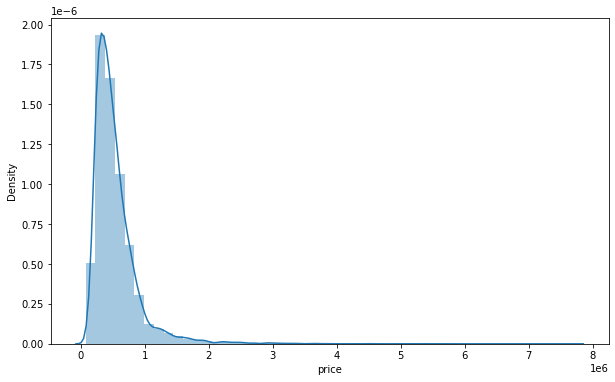

In [8]:
#let us the distribution of the prices 
plt.figure(figsize= (10,6))
sns.distplot(df["price"])
#from the plot below, we could tell that most of the house prices are
#falling between 0 and 2x10e6

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

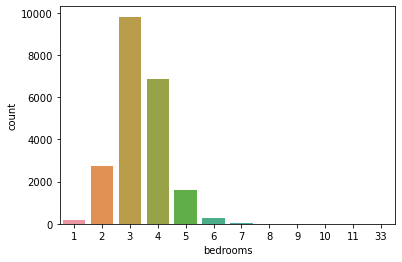

In [9]:
#we can do more exploratory analysis on the data, let us see the 
#distribution of the number of bedrooms 
sns.countplot(df["bedrooms"])
#we can see that houses with 3 bedroom is highest in the market

In [10]:
#let us see which of the features highly correlates with the prices of
#the house
df.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [11]:
#let us sort these values 
df.corr()["price"].sort_values(ascending = True )
#we can see that the feature that most correlates with the price 
#is sqft_living

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

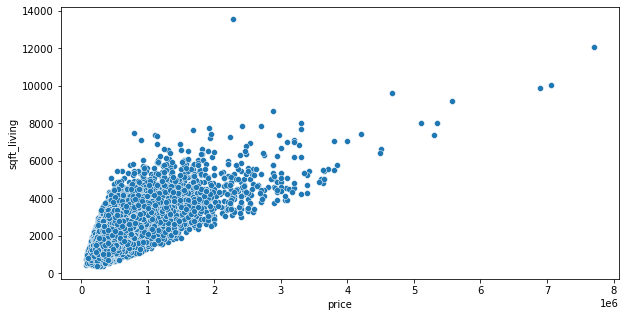

In [12]:
#let us see the plot of the price with the sqft_living
plt.figure(figsize= (10,5))
sns.scatterplot(x = df["price"], y = df["sqft_living"], data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

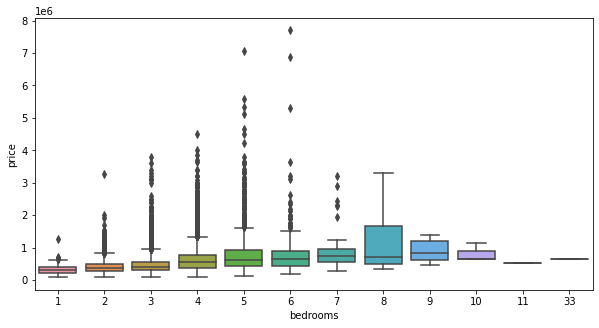

In [13]:
#let us see the price distribution in respect to the number of bedroom
plt.figure(figsize= (10,5))
sns.boxplot(x = df["bedrooms"], y= df["price"], data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

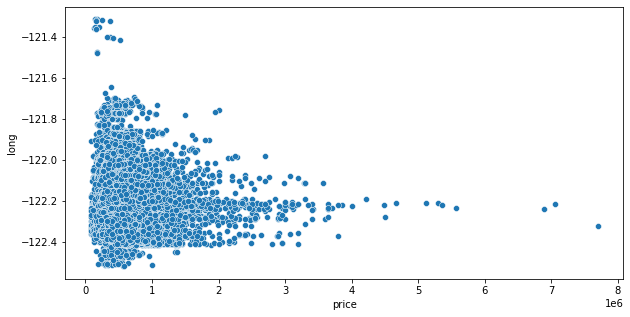

In [14]:
#let us explore the effect of locations on the prices using the 
#long features
plt.figure(figsize= (10,5))
sns.scatterplot(x = df["price"], y = df["long"], data = df)

#we can see that at the long location between -122.4 and 122.2 there
#are expensive houses

<AxesSubplot:xlabel='price', ylabel='lat'>

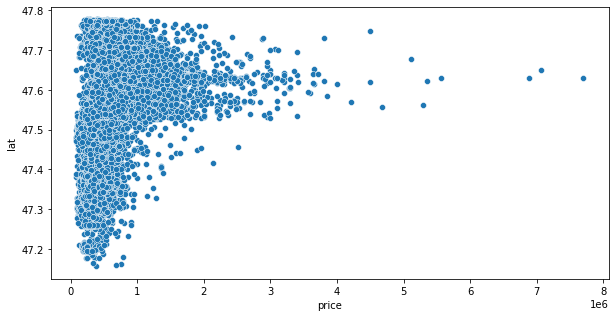

In [15]:
#let us explore the effect of locations on the prices using the 
#lat features
plt.figure(figsize= (10,5))
sns.scatterplot(x = df["price"], y = df["lat"], data = df)

#we can see that at the location between 47.6 and 47.7 there are
#expensive houses

<AxesSubplot:xlabel='long', ylabel='lat'>

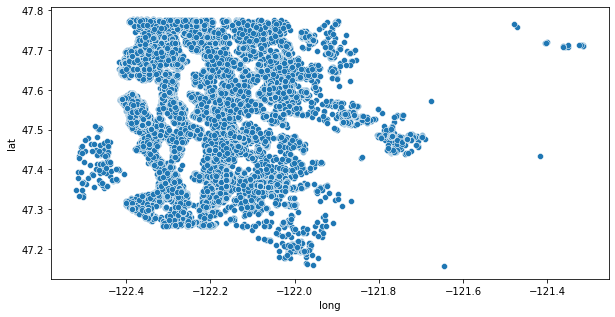

In [16]:
#let us plot the long vs lat to see this locations on a real map
plt.figure(figsize= (10,5))
sns.scatterplot(x = df["long"], y= df["lat"], data = df )

<AxesSubplot:xlabel='long', ylabel='lat'>

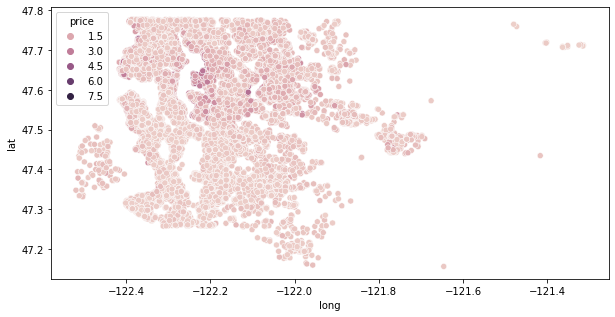

In [17]:
#we can superimpose the prices of the house on the location by using 
#the HUE function 
plt.figure(figsize= (10,5))
sns.scatterplot(x = df["long"], y= df["lat"], hue= df["price"], 
                data = df )

In [18]:
#from the visualisation above, it seems we could not see the dot for 
#for the very expensive houses, let us explore the data more 
df.sort_values("price", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [19]:
#let us assume that the top 1% of the total houses are the most 
#expensive ones 
len(df)

21597

In [20]:
len(df)*0.01

215.97

In [21]:
non_top_1_perc = df.sort_values("price", ascending = False).iloc[216:]

In [22]:
non_top_1_perc
#these are the bottom 99% houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

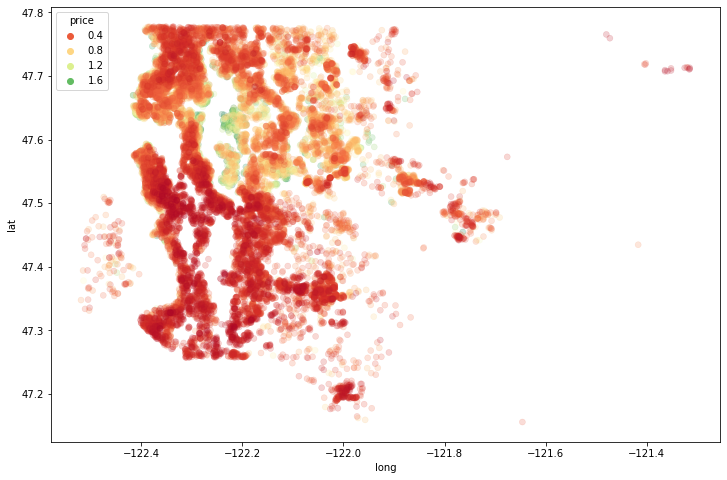

In [23]:
#now let us perform the exploratory analysis on this data, using the 
#lat and long and prices to see the locations of the expensive houses
plt.figure(figsize = (12,8))
sns.scatterplot(x = "long", y = "lat", hue = "price", 
                edgecolor = None, alpha = 0.2
                , data = non_top_1_perc, palette = "RdYlGn")

In [24]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<AxesSubplot:xlabel='waterfront', ylabel='price'>

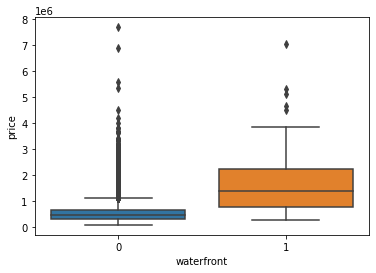

In [25]:
sns.boxplot(x = "waterfront", y = "price", data = df )
#we can see that the houses with water front are more expensive, which
#actually makes sense.

In [26]:
#let us go back to the original data and carry out some feature 
#engineering 
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
#since the id column is of no use, let us drop it 
df = df.drop("id", axis = 1)

In [29]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
df["date"]

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [31]:
df["date"]= pd.to_datetime(df["date"])

In [32]:
df["date"]
#we have been able to convert the date to a datetime format, where we
#we could extract the year and month

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [33]:
#let us do some feature engineering and extraction by including the 
#year and month to the dataframe
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

In [35]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

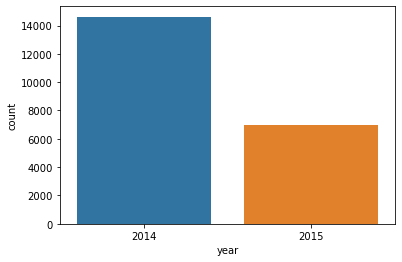

In [38]:
sns.countplot(df["year"])
#to see which year had the highest number of sales

<AxesSubplot:xlabel='month', ylabel='price'>

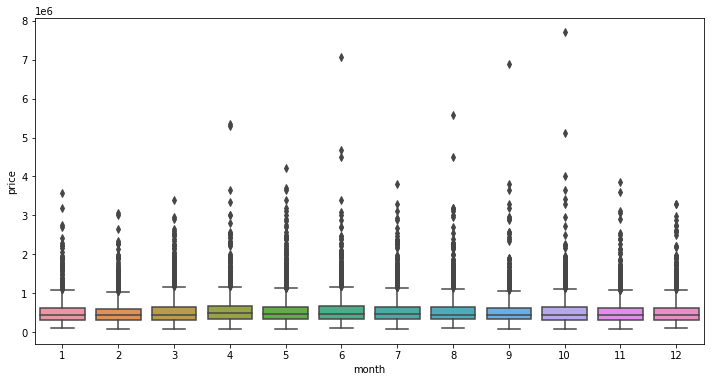

In [45]:
#let us which of the months is prices of houses most expensive
plt.figure(figsize = (12,6))
sns.boxplot(x = "month", y = "price", data = df)

In [46]:
df.groupby("month").mean()["price"]

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [47]:
(df.groupby("month").mean()["price"]).sort_values(ascending = True)

month
2     508520.051323
11    522359.903478
12    524799.902041
1     525963.251534
9     529723.517787
8     536655.212481
10    539439.447228
3     544057.683200
7     544892.161013
5     550849.746893
6     557534.318182
4     562215.615074
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

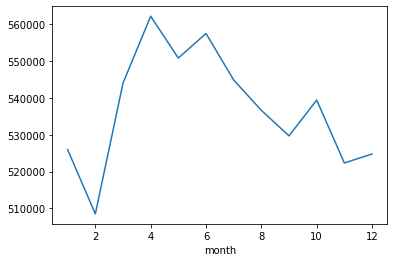

In [50]:
df.groupby("month").mean()["price"].plot()

<AxesSubplot:xlabel='year', ylabel='price'>

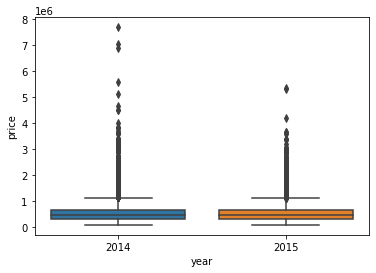

In [51]:
#let us explore the price behabiour with respect to the year
sns.boxplot(x = "year", y = "price", data= df)

In [52]:
df.groupby("year").mean()["price"]

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

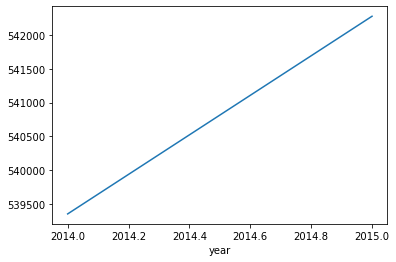

In [53]:
df.groupby("year").mean()["price"].plot()

In [54]:
#since we have engineered and extracted the date column, we can just 
#drop it
df = df.drop("date", axis = 1)

In [55]:
df.columns 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [57]:
df.corr()["lat"].sort_values(ascending = True)

yr_built        -0.148370
long            -0.135371
sqft_lot15      -0.086139
sqft_lot        -0.085514
year            -0.029003
condition       -0.015102
waterfront      -0.014306
bedrooms        -0.009951
sqft_above      -0.001199
view             0.005871
month            0.014995
bathrooms        0.024280
yr_renovated     0.029350
sqft_living15    0.048679
floors           0.049239
sqft_living      0.052155
sqft_basement    0.110414
grade            0.113575
zipcode          0.266742
price            0.306692
lat              1.000000
Name: lat, dtype: float64

In [58]:
df.corr()["long"].sort_values(ascending = True)

zipcode         -0.564259
sqft_basement   -0.144546
lat             -0.135371
condition       -0.105877
view            -0.078107
yr_renovated    -0.068321
waterfront      -0.041904
month           -0.008404
year             0.000296
price            0.022036
floors           0.125943
bedrooms         0.132054
grade            0.200341
bathrooms        0.224903
sqft_lot         0.230227
sqft_living      0.241214
sqft_lot15       0.255586
sqft_living15    0.335626
sqft_above       0.344842
yr_built         0.409993
long             1.000000
Name: long, dtype: float64

In [60]:
#we can also explore the number of unique zipcodes in the dataset
df["zipcode"].value_counts()
#it appears we have 70 unique zipcodes in the dataset, which might be
#too many for us to create a dummy for. so we will just drop it

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [63]:
df= df.drop("zipcode", axis = 1)

In [64]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [65]:
#let us explore the yr_renovated, to see if it should be dropped 
df["yr_renovated"].value_counts()
#seems we have 69 unique year that the houses were renovated, lots of 
#0 times that the houses where not renovated

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [66]:
X = df.drop("price", axis = 1).values
y = df["price"].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
   test_size = 0.3, random_state = 101)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [73]:
X_train = scaler.transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

In [75]:
X_train

array([[1.00000000e-01, 2.66666667e-01, 1.52619590e-01, ...,
        6.83361879e-03, 0.00000000e+00, 6.36363636e-01],
       [3.00000000e-01, 4.33333333e-01, 2.14123007e-01, ...,
        1.47550569e-02, 1.00000000e+00, 2.72727273e-01],
       [2.00000000e-01, 2.66666667e-01, 1.03264996e-01, ...,
        7.21268992e-03, 0.00000000e+00, 7.27272727e-01],
       ...,
       [3.00000000e-01, 1.33333333e-01, 8.80789674e-02, ...,
        9.01614958e-03, 0.00000000e+00, 5.45454545e-01],
       [0.00000000e+00, 3.33333333e-02, 7.59301443e-04, ...,
        1.64827023e-02, 0.00000000e+00, 4.54545455e-01],
       [3.00000000e-01, 2.66666667e-01, 1.81093394e-01, ...,
        1.39911711e-02, 1.00000000e+00, 1.81818182e-01]])

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#the model we are using to train and predict is Sequential and layer
#is Dense

In [78]:
X_train.shape

(15117, 19)

In [79]:
#let us create our neurons for the Neural Network, dense is fully
#connected, activation is Rectified linear unit, we are using 19 
#neurons per layer because we have features and using 1 input layer, 
#3 hidden layer and 1 output layer
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")
#our optimizer is adam and loss function is mean sqaured error.

In [81]:
model.fit(x = X_train, y = y_train, validation_data= (X_test, y_test)
         , batch_size= 128, epochs = 400 )

#the reason we are using validation data is for us to be able to 
#evaluate the performance of the model on the test set as it fits 
#through the data
#the batch size should always be a multiple of 2, the smaller the 
#batch the longer it will take the model to be trained but also less
#likely to have overfitting because you have enough dataset in each 
#batch for the data to train


Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 429736886272.0000 - val_loss: 420039753728.0000
Epoch 2/400
119/119 [==============================] - 0s 945us/step - loss: 428362629120.0000 - val_loss: 415467569152.0000
Epoch 3/400
119/119 [==============================] - 0s 969us/step - loss: 410447675392.0000 - val_loss: 374815653888.0000
Epoch 4/400
119/119 [==============================] - 0s 955us/step - loss: 324021583872.0000 - val_loss: 238918434816.0000
Epoch 5/400
119/119 [==============================] - 0s 980us/step - loss: 167946682368.0000 - val_loss: 109749035008.0000
Epoch 6/400
119/119 [==============================] - 0s 977us/step - loss: 101912215552.0000 - val_loss: 97715437568.0000
Epoch 7/400
119/119 [==============================] - 0s 950us/step - loss: 97703788544.0000 - val_loss: 96190324736.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 95978348544.0000 - val_loss: 94493605888.0000
Epoch 9/4

119/119 [==============================] - 0s 880us/step - loss: 36776132608.0000 - val_loss: 38486085632.0000
Epoch 68/400
119/119 [==============================] - 0s 889us/step - loss: 36614676480.0000 - val_loss: 38345482240.0000
Epoch 69/400
119/119 [==============================] - 0s 876us/step - loss: 36397842432.0000 - val_loss: 38321840128.0000
Epoch 70/400
119/119 [==============================] - 0s 895us/step - loss: 36312637440.0000 - val_loss: 38017245184.0000
Epoch 71/400
119/119 [==============================] - 0s 847us/step - loss: 36112199680.0000 - val_loss: 37819658240.0000
Epoch 72/400
119/119 [==============================] - 0s 830us/step - loss: 35985575936.0000 - val_loss: 37708460032.0000
Epoch 73/400
119/119 [==============================] - 0s 832us/step - loss: 35795468288.0000 - val_loss: 37504999424.0000
Epoch 74/400
119/119 [==============================] - 0s 867us/step - loss: 35618078720.0000 - val_loss: 37444325376.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 834us/step - loss: 31830200320.0000 - val_loss: 33473210368.0000
Epoch 134/400
119/119 [==============================] - 0s 843us/step - loss: 31794604032.0000 - val_loss: 33442557952.0000
Epoch 135/400
119/119 [==============================] - 0s 845us/step - loss: 31750170624.0000 - val_loss: 33452615680.0000
Epoch 136/400
119/119 [==============================] - 0s 822us/step - loss: 31756800000.0000 - val_loss: 33399486464.0000
Epoch 137/400
119/119 [==============================] - 0s 901us/step - loss: 31730178048.0000 - val_loss: 33395472384.0000
Epoch 138/400
119/119 [==============================] - 0s 927us/step - loss: 31701266432.0000 - val_loss: 33348401152.0000
Epoch 139/400
119/119 [==============================] - 0s 905us/step - loss: 31648598016.0000 - val_loss: 33279819776.0000
Epoch 140/400
119/119 [==============================] - 0s 894us/step - loss: 31640440832.0000 - val_loss: 33244917760.0000


119/119 [==============================] - 0s 867us/step - loss: 30349809664.0000 - val_loss: 32166825984.0000
Epoch 199/400
119/119 [==============================] - 0s 847us/step - loss: 30315247616.0000 - val_loss: 32165013504.0000
Epoch 200/400
119/119 [==============================] - 0s 839us/step - loss: 30334896128.0000 - val_loss: 32135325696.0000
Epoch 201/400
119/119 [==============================] - 0s 836us/step - loss: 30278668288.0000 - val_loss: 32199847936.0000
Epoch 202/400
119/119 [==============================] - 0s 864us/step - loss: 30290231296.0000 - val_loss: 32270659584.0000
Epoch 203/400
119/119 [==============================] - 0s 843us/step - loss: 30269360128.0000 - val_loss: 32080601088.0000
Epoch 204/400
119/119 [==============================] - 0s 861us/step - loss: 30238869504.0000 - val_loss: 32085850112.0000
Epoch 205/400
119/119 [==============================] - 0s 849us/step - loss: 30208161792.0000 - val_loss: 32064503808.0000
Epoch 206/400


119/119 [==============================] - 0s 856us/step - loss: 29356687360.0000 - val_loss: 31365169152.0000
Epoch 264/400
119/119 [==============================] - 0s 835us/step - loss: 29378080768.0000 - val_loss: 31371499520.0000
Epoch 265/400
119/119 [==============================] - 0s 835us/step - loss: 29371607040.0000 - val_loss: 31334172672.0000
Epoch 266/400
119/119 [==============================] - 0s 835us/step - loss: 29340108800.0000 - val_loss: 31323334656.0000
Epoch 267/400
119/119 [==============================] - 0s 842us/step - loss: 29308303360.0000 - val_loss: 31342508032.0000
Epoch 268/400
119/119 [==============================] - 0s 829us/step - loss: 29342085120.0000 - val_loss: 31283949568.0000
Epoch 269/400
119/119 [==============================] - 0s 856us/step - loss: 29317240832.0000 - val_loss: 31285407744.0000
Epoch 270/400
119/119 [==============================] - 0s 834us/step - loss: 29334599680.0000 - val_loss: 31282649088.0000
Epoch 271/400


119/119 [==============================] - 0s 875us/step - loss: 28618307584.0000 - val_loss: 30606407680.0000
Epoch 329/400
119/119 [==============================] - 0s 849us/step - loss: 28612556800.0000 - val_loss: 30556821504.0000
Epoch 330/400
119/119 [==============================] - 0s 852us/step - loss: 28578459648.0000 - val_loss: 30548871168.0000
Epoch 331/400
119/119 [==============================] - 0s 861us/step - loss: 28608018432.0000 - val_loss: 30521907200.0000
Epoch 332/400
119/119 [==============================] - 0s 852us/step - loss: 28613421056.0000 - val_loss: 30523422720.0000
Epoch 333/400
119/119 [==============================] - 0s 870us/step - loss: 28534145024.0000 - val_loss: 30509780992.0000
Epoch 334/400
119/119 [==============================] - 0s 870us/step - loss: 28547719168.0000 - val_loss: 30483556352.0000
Epoch 335/400
119/119 [==============================] - 0s 875us/step - loss: 28527669248.0000 - val_loss: 30465660928.0000
Epoch 336/400


119/119 [==============================] - 0s 895us/step - loss: 27840493568.0000 - val_loss: 29810397184.0000
Epoch 394/400
119/119 [==============================] - 0s 858us/step - loss: 27811297280.0000 - val_loss: 29797216256.0000
Epoch 395/400
119/119 [==============================] - 0s 846us/step - loss: 27828584448.0000 - val_loss: 29782605824.0000
Epoch 396/400
119/119 [==============================] - 0s 842us/step - loss: 27787511808.0000 - val_loss: 29808672768.0000
Epoch 397/400
119/119 [==============================] - 0s 859us/step - loss: 27775354880.0000 - val_loss: 29778550784.0000
Epoch 398/400
119/119 [==============================] - 0s 843us/step - loss: 27779330048.0000 - val_loss: 29764489216.0000
Epoch 399/400
119/119 [==============================] - 0s 883us/step - loss: 27770435584.0000 - val_loss: 29761406976.0000
Epoch 400/400
119/119 [==============================] - 0s 858us/step - loss: 27745140736.0000 - val_loss: 29800531968.0000


In [82]:
#let us extract the losses
model.history.history

{'loss': [429736886272.0,
  428362629120.0,
  410447675392.0,
  324021583872.0,
  167946682368.0,
  101912215552.0,
  97703788544.0,
  95978348544.0,
  94189150208.0,
  92393684992.0,
  90500325376.0,
  88571920384.0,
  86522568704.0,
  84396449792.0,
  82163023872.0,
  79817728000.0,
  77445881856.0,
  74860085248.0,
  72170070016.0,
  69402148864.0,
  66682601472.0,
  63993118720.0,
  61365284864.0,
  58996813824.0,
  56882454528.0,
  55023300608.0,
  53465509888.0,
  52129783808.0,
  51087503360.0,
  50024177664.0,
  49194917888.0,
  48408096768.0,
  47704145920.0,
  47032684544.0,
  46458015744.0,
  45862694912.0,
  45334614016.0,
  44840218624.0,
  44343218176.0,
  43915747328.0,
  43503480832.0,
  43128066048.0,
  42763018240.0,
  42428280832.0,
  42085163008.0,
  41768824832.0,
  41538973696.0,
  41231556608.0,
  40968323072.0,
  40709660672.0,
  40433213440.0,
  40155291648.0,
  39888048128.0,
  39665360896.0,
  39377670144.0,
  39145971712.0,
  38887559168.0,
  38628372480.0,


In [83]:
losses = pd.DataFrame(model.history.history)

In [84]:
losses

,loss,val_loss
0,4.297369e+11,4.200398e+11
1,4.283626e+11,4.154676e+11
2,4.104477e+11,3.748157e+11
3,3.240216e+11,2.389184e+11
4,1.679467e+11,1.097490e+11
...,...,...
395,2.778751e+10,2.980867e+10
396,2.777535e+10,2.977855e+10
397,2.777933e+10,2.976449e+10
398,2.777044e+10,2.976141e+10


<AxesSubplot:>

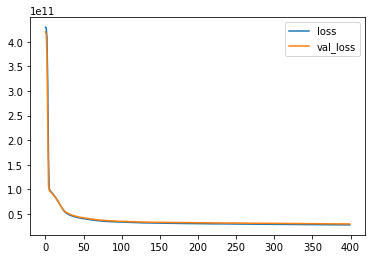

In [85]:
losses.plot()
#this is a good result as the loss function is decreasing and stable 
#at some points, also the validation loss.

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [90]:
predictions = model.predict(X_test)

In [91]:
mean_absolute_error(y_test, predictions)

106111.82164911767

In [92]:
mean_squared_error(y_test, predictions)

29800536760.433094

In [94]:
np.sqrt(mean_squared_error(y_test, predictions))

172628.31969417154

In [95]:
df["price"].mean()

540296.5735055795

In [96]:
(106111.82164911767/540296.5735055795)*100

19.63955110072929

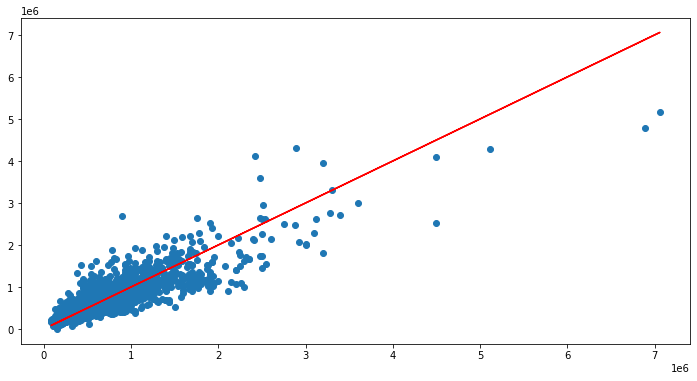

In [100]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, "r") #to show us line of best fit

In [99]:
explained_variance_score(y_test, predictions)
#this is telling us the variance of the prediction from the y_test. 
#1 is best and 0 worse.

0.7754261877255518

In [107]:
#now let us assume we want to sell a house with the following feature,
#and want to predict the price
new_h_feat= df.drop("price", axis = 1).iloc[0]

In [108]:
new_h_feat

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [114]:
new_h_feat = new_h_feat.values 

In [116]:
new_h_feat= new_h_feat.reshape(-1,19)
#this helps to reshape the dataset so that the features are still 
#maintained along the axis

In [117]:
new_h_feat = scaler.transform(new_h_feat)

In [118]:
new_h_feat

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.81818182]])

In [119]:
new_h_feat_pre = model.predict(new_h_feat)

In [120]:
new_h_feat_pre

array([[294135.4]], dtype=float32)

The predicted value of this house based on it features is $294135.4